In [150]:
from pprint import pprint
import numpy as np

Description rapide du dataset

In [151]:
from dataset import digits_dataset
print(digits_dataset)

Dataset: Optical recognition of handwritten digits dataset
Description: **Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where eac

In [152]:
from visualizer import Visualizer
vs = Visualizer()

Un affichage basique d'un nombre avec des *.

index = 0 et threshold = 8 (par défaut)

In [153]:
vs.show_number_matrix(0)

array([[' ', ' ', ' ', '*', '*', ' ', ' ', ' '],
       [' ', ' ', '*', '*', '*', '*', ' ', ' '],
       [' ', ' ', '*', ' ', ' ', '*', ' ', ' '],
       [' ', ' ', '*', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', '*', ' ', ' '],
       [' ', ' ', '*', ' ', ' ', '*', ' ', ' '],
       [' ', ' ', '*', ' ', '*', '*', ' ', ' '],
       [' ', ' ', ' ', '*', '*', ' ', ' ', ' ']], dtype='<U1')


Affichage de chaque nombre N fois.

• amount : N

• colored : False pour N&B True pour coloriage thermique

In [154]:
vs.show(amount = 5, colored = False)

Un petit résumé de notre clustering avec quelques métriques qui vont nous permettre de repérer les classes problématiques.

In [ ]:
#K-moyennes avec K=10 sur la base d’apprentissage (BA)

from kmeans import Kmeans
K = 10
kmeans = Kmeans(K)
kmeans.run()        # fit + summary saved in kmeans object

kmeans.summary()


Cluster 0: Counter({False: 3451, True: 372})
Cluster 1: Counter({False: 3435, True: 388})
Cluster 2: Counter({False: 3465, True: 358})
Cluster 3: Counter({False: 3412, True: 411})
Cluster 4: Counter({False: 3427, True: 396})
Cluster 5: Counter({False: 3430, True: 393})
Cluster 6: Counter({False: 3432, True: 391})
Cluster 7: Counter({False: 3446, True: 377})
Cluster 8: Counter({False: 3448, True: 375})
Cluster 9: Counter({False: 3461, True: 362})


In [ ]:
clusters = kmeans.clusters
map_clusters = kmeans.clusters_map
pprint(kmeans.predicted_table)
pprint(map_clusters)
x = [a for a in kmeans.predicted_table if a == "OK"]
print(len(x))
vs.show_clusters(clusters, map_clusters, 20, True, True)

AttributeError: 'Kmeans' object has no attribute 'predicted_table'

On utilise l'algorithme t-SNE pour avoir une bonne représentation des clusters sous forme graphique.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


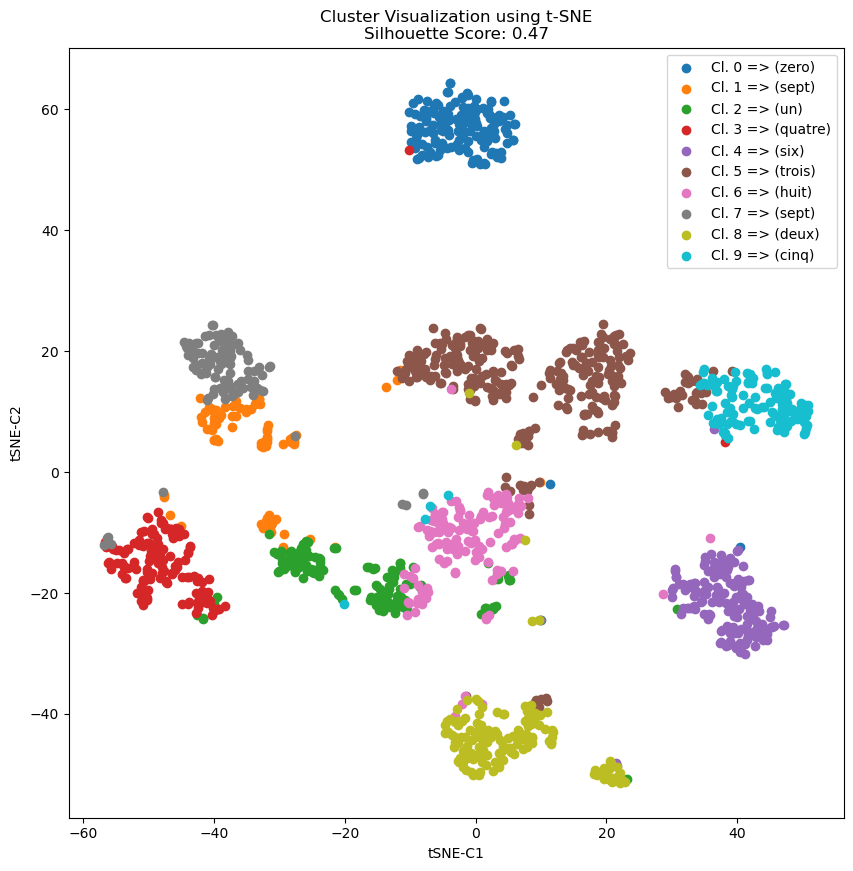

In [ ]:
vs.plot_clusters(kmeans)

[5,
 6,
 5,
 0,
 2,
 7,
 1,
 0,
 6,
 6,
 7,
 0,
 8,
 4,
 9,
 8,
 4,
 3,
 8,
 4,
 8,
 4,
 2,
 9,
 9,
 7,
 1,
 2,
 6,
 0,
 0,
 8,
 1,
 1,
 6,
 9,
 2,
 1,
 0,
 0,
 5,
 5,
 0,
 9,
 7,
 1,
 6,
 2,
 4,
 0,
 9,
 7,
 2,
 7,
 8,
 6,
 3,
 9,
 6,
 6,
 6,
 5,
 6,
 5,
 1,
 5,
 4,
 3,
 8,
 1,
 0,
 4,
 1,
 9,
 0,
 1,
 6,
 9,
 2,
 3,
 9,
 1,
 0,
 2,
 7,
 9,
 9,
 0,
 2,
 3,
 3,
 6,
 5,
 6,
 1,
 7,
 7,
 0,
 7,
 9]
array([9, 8, 0, 9, 1, 3, 8, 4, 4, 2, 3, 3, 5, 0, 6, 4, 6, 4, 1, 0, 0, 4,
       1, 0, 9, 4, 0, 2, 8, 7, 0, 1, 2, 0, 8, 8, 3, 2, 6, 6, 6, 2, 6, 7,
       5, 8, 6, 1, 2, 5, 7, 6, 1, 2, 6, 4, 6, 7, 5, 6, 3, 8, 2, 5, 1, 8,
       6, 0, 0, 8, 8, 7, 7, 1, 2, 8, 0, 5, 8, 2, 1, 5, 3, 0, 0, 7, 8, 2,
       2, 8, 2, 8, 9, 8, 9, 4, 3, 8, 0, 7])


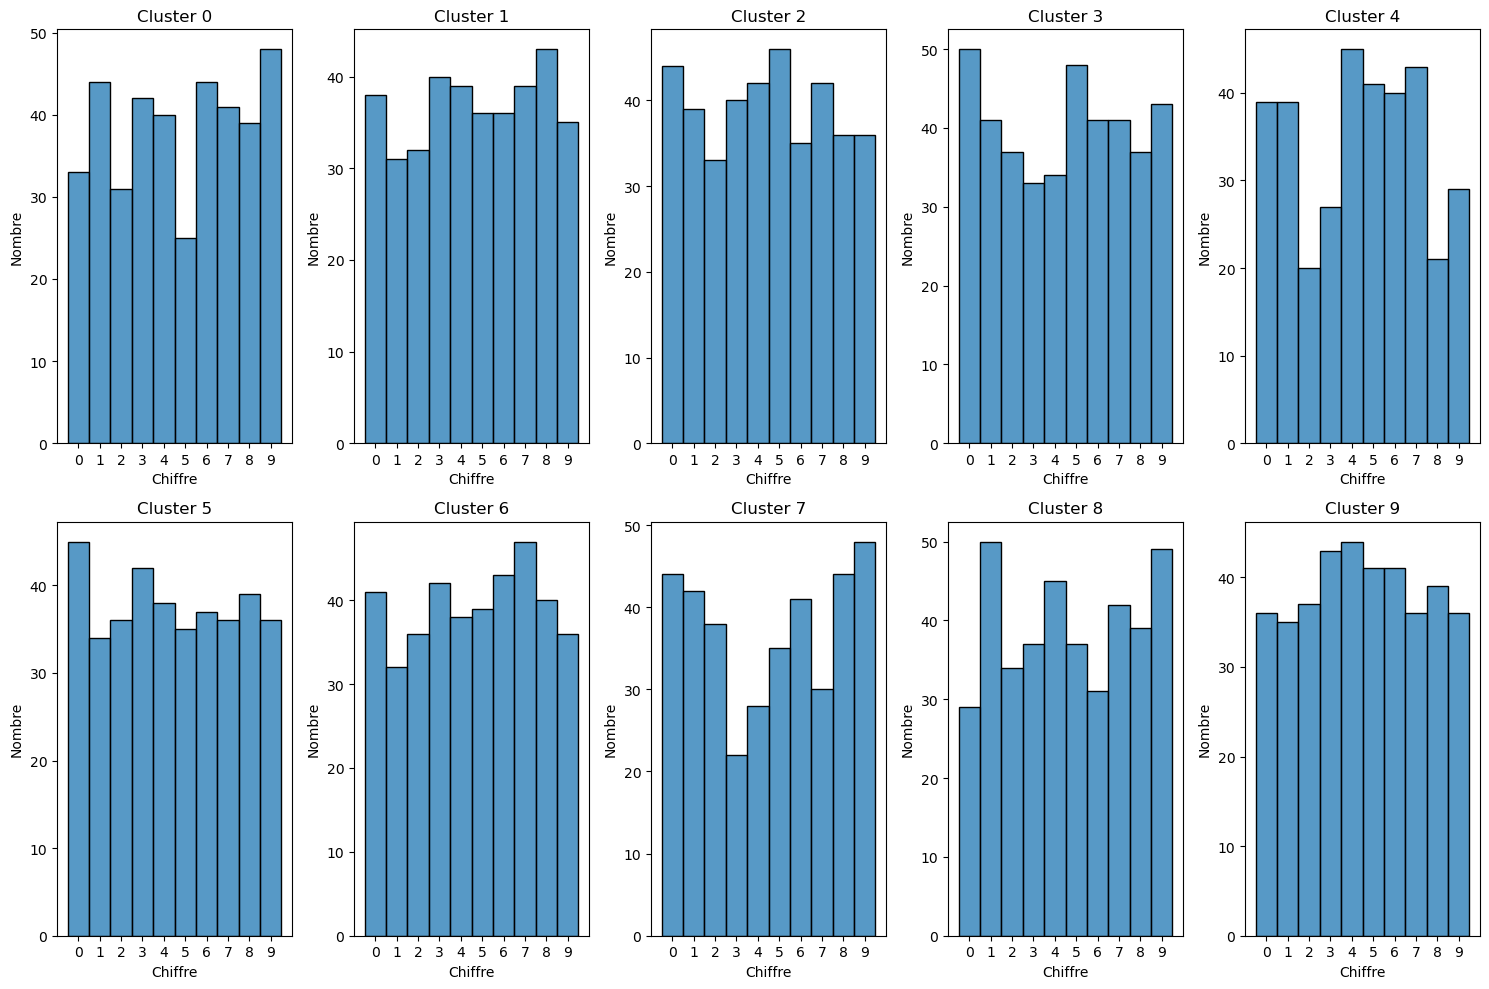

In [ ]:
import matplotlib.pyplot as plt

# Correcting the predicted table to contain only digit labels for histogram generation
def extract_digit_labels(predicted_table, data):
    digit_labels = []
    for idx, entry in enumerate(predicted_table):
        if isinstance(entry, str) and "Predicted" in entry:
            actual_label = int(entry.split()[-1])
            digit_labels.append(actual_label)
        elif isinstance(entry, str) and entry == "OK":
            # Use the actual label from the data for "OK" entries
            actual_label = data[idx, -1]
            digit_labels.append(actual_label)
        else:
            digit_labels.append(entry)
    return digit_labels

# Extracting correct digit labels
correct_labels = extract_digit_labels(kmeans.predicted_table, kmeans.data)

# Function to plot histograms of the number of digits in each cluster
def plot_cluster_histograms(clusters_map, digit_labels):
    cluster_labels = np.unique(clusters_map)
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, label in enumerate(cluster_labels):
        # Extract the digit labels for each cluster
        cluster_data = [digit_labels[j] for j in range(len(clusters_map)) if clusters_map[j] == label]
        sns.histplot(cluster_data, bins=np.arange(11)-0.5, ax=axes[i], kde=False)
        axes[i].set_title(f'Cluster {label}')
        axes[i].set_xlabel('Chiffre')
        axes[i].set_ylabel('Nombre')
        axes[i].set_xticks(range(10))
        
    plt.tight_layout()
    plt.show()

# Display the available information for verification
pprint(correct_labels[:100])  # Limiting the output for readability
pprint(kmeans.clusters_map[:100])  # Limiting the output for readability

# Call the function to plot the histograms
plot_cluster_histograms(kmeans.clusters_map, correct_labels)

Instinctivement on voudrait que ce soit 10 clusters qui suffisent et qu'on ait un cluster par chiffre

In [ ]:
k_values = range(10,20)
best_k = kmeans.find_best_k(k_values)


Convergence reached after 29 iterations.
Convergence reached after 19 iterations.
Convergence reached after 15 iterations.
Convergence reached after 19 iterations.
Convergence reached after 33 iterations.
Convergence reached after 35 iterations.
Convergence reached after 34 iterations.
Convergence reached after 19 iterations.
Convergence reached after 17 iterations.
Convergence reached after 28 iterations.


In [ ]:
pprint(best_k)

[(11, 0.8196912059507255, 0.1822039410306674, 0.7453829174933697),
 (12, 0.8036051964355962, 0.18054835250745316, 0.7214288879228449),
 (13, 0.8362382995711941, 0.18502382543384946, 0.7380906332339158),
 (14, 0.8868575530764999, 0.19031584618251293, 0.7564679104160991),
 (15, 0.8824705675530021, 0.1885231269975972, 0.7418490110302173),
 (16, 0.8848282225580272, 0.18793444104172793, 0.7272485576019241),
 (17, 0.88105764933075, 0.17966743056763157, 0.71273802307911),
 (18, 0.8748430164829429, 0.172535880908794, 0.6925252234049912),
 (19, 0.8962351666135578, 0.175399057284984, 0.7051158331042549)]


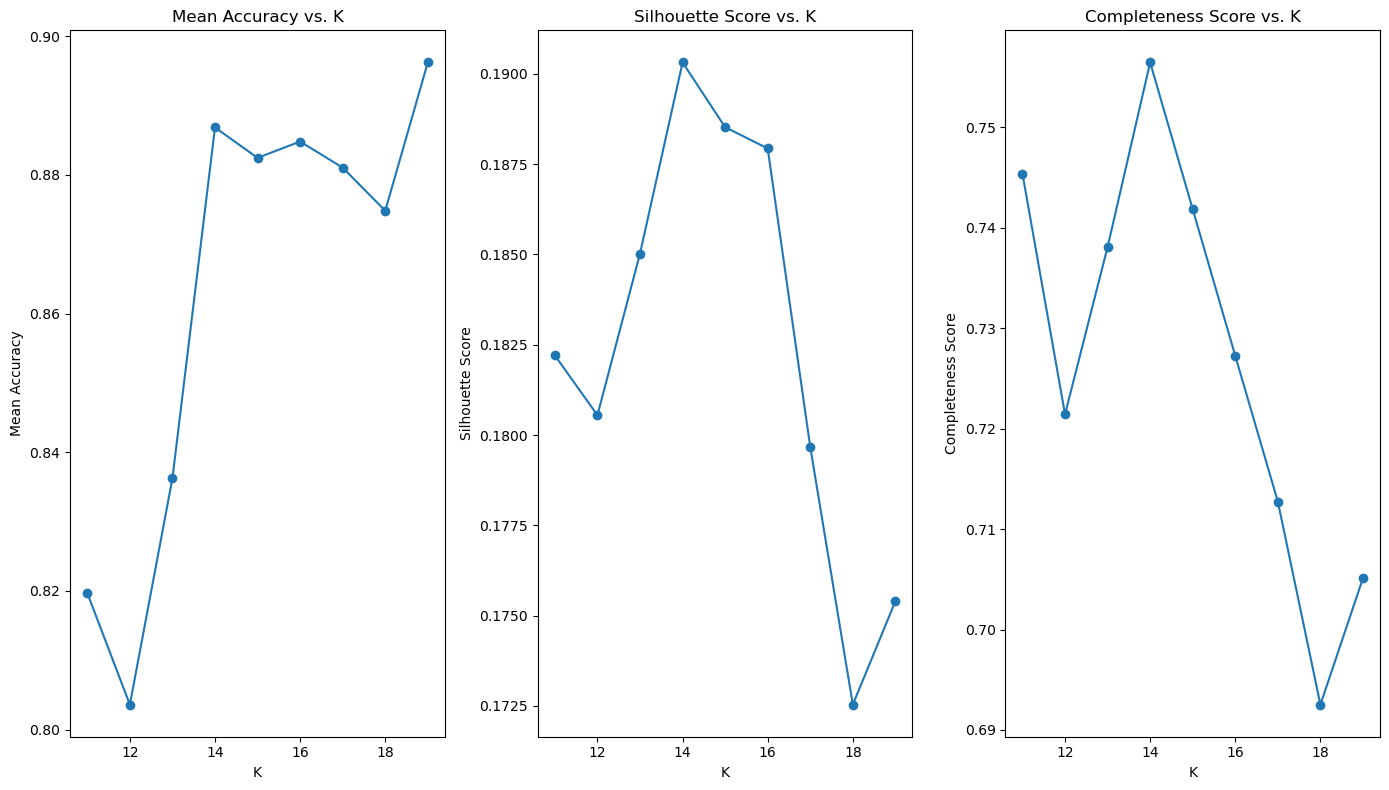

In [ ]:
vs.plot_best_k_metrics(best_k)

In [ ]:
k_opt = best_k[np.argmax([x[2] for x in best_k])][0]
kmeans_opt = Kmeans(k=k_opt)
kmeans_opt.run()

Convergence reached after 33 iterations.


In [ ]:
conf_matrix = kmeans_opt.confusion_matrix()
pprint(conf_matrix)

array([[142,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 145,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   7, 117,   6,   0,   0,   0,   2,   8,   2],
       [  0,   0,   1, 130,   0,   2,   0,   2,   3,   8],
       [  0,   5,   0,   0, 131,   0,   0,   8,   0,   0],
       [  0,   0,   0,   1,   1, 132,   1,   0,   0,  10],
       [  1,   2,   0,   0,   0,   0, 141,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 143,   0,   0],
       [  0,  34,   2,   0,   0,   6,   1,   0,  96,   2],
       [  0,  14,   0,   1,   0,   2,   0,   9,   2, 115]])


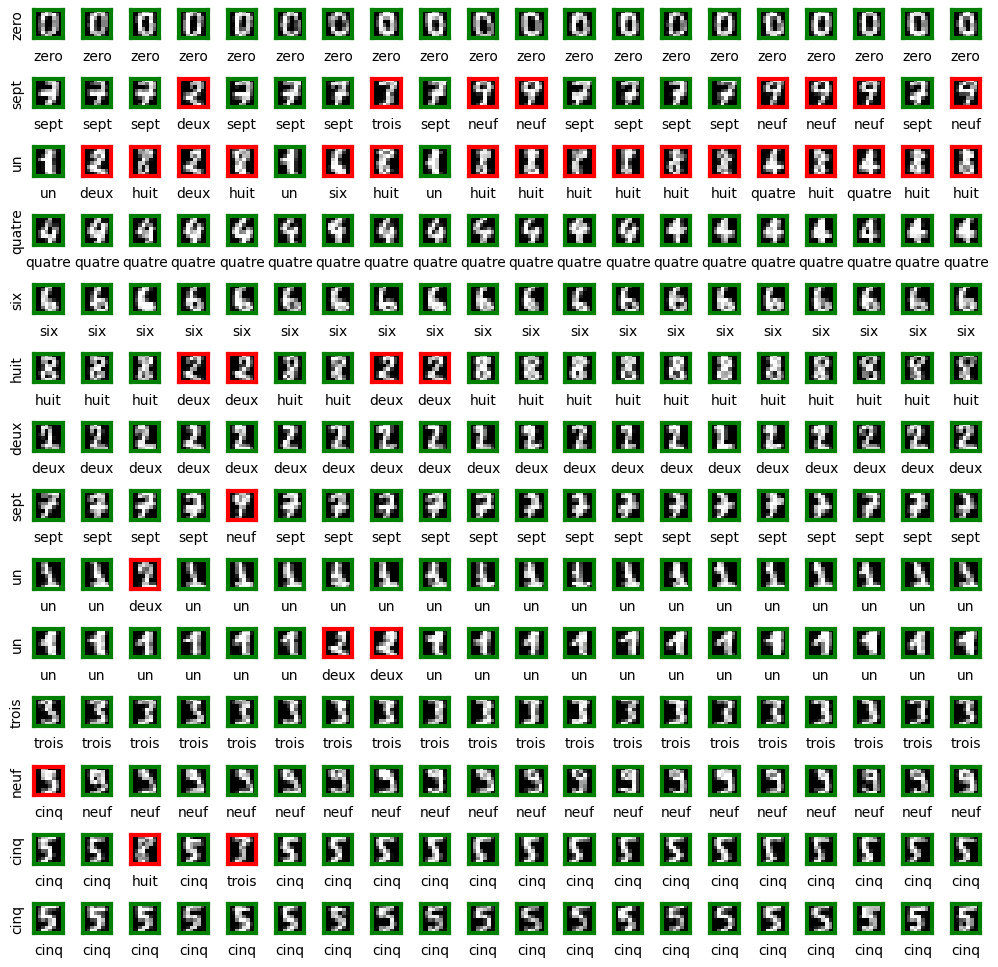

In [ ]:
clusters_opt = kmeans_opt.clusters
map_clusters_opt = kmeans_opt.clusters_map

vs.show_clusters(clusters_opt, map_clusters_opt, 20, True, True) 

SyntaxError: invalid syntax (522202233.py, line 11)

In [ ]:
kmeans_opt.summary()

Kmeans with 14 clusters
Centroids: (14, 64)
Clusters: 1437 elements
Mean Accuracy: 88.69%
Cluster to Label Mapping: {0: 0, 1: 7, 2: 1, 3: 4, 4: 6, 5: 8, 6: 2, 7: 7, 8: 1, 9: 1, 10: 3, 11: 9, 12: 5, 13: 5}
Silhouette Score: 0.19031584618251293
Completeness Score: 0.7564679104160991
Cluster Accuracies: {0: (0, 0.993006993006993), 1: (7, 0.7878787878787878), 2: (1, 0.6486486486486487), 3: (4, 0.9849624060150376), 4: (6, 0.986013986013986), 5: (8, 0.8807339449541285), 6: (2, 0.975), 7: (7, 0.9285714285714286), 8: (1, 0.9310344827586207), 9: (1, 0.6865671641791045), 10: (3, 0.9420289855072463), 11: (9, 0.8394160583941606), 12: (5, 0.8571428571428571), 13: (5, 0.975)}



In [ ]:
pprint(len(kmeans_opt.data))
pprint(len(kmeans_opt.test))
pprint(kmeans_opt.test)

1437
360
array([[ 0.,  4., 16., ..., 12., 11.,  0.],
       [ 0.,  1., 12., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])


Test

In [ ]:
import numpy as np
from collections import Counter

# Fonction pour déterminer le label majoritaire de chaque cluster et ajuster pour inclure toutes les classes
#def majority_vote_labels(clusters_map, digit_labels, num_classes=10):
#    cluster_labels = np.unique(clusters_map)
#    majority_labels = {}
    
    # Dictionnaire pour stocker les classes et leurs clusters associés
#    class_to_clusters = {i: [] for i in range(num_classes)}
    
    # Détermination des labels majoritaires initiaux
#    for label in cluster_labels:
#        cluster_data = [digit_labels[j] for j in range(len(clusters_map)) if clusters_map[j] == label]
#        if cluster_data:
#            most_common_label = Counter(cluster_data).most_common(1)[0][0]
#            majority_labels[label] = most_common_label
#            class_to_clusters[most_common_label].append(label)
   
    # Identification des classes manquantes et en excès
#    missing_classes = [i for i in range(num_classes) if i not in majority_labels.values()]
#    excess_classes = [cls for cls, clusters in class_to_clusters.items() if len(clusters) > 1]
    
    # Réaffectation pour garantir que chaque classe est représentée
#    for missing in missing_classes:
#        if excess_classes:
#            excess = excess_classes.pop(0)
            # Récupérer un cluster de la classe en excès à réassigner
#            cluster_to_reassign = class_to_clusters[excess].pop(0)
#            majority_labels[cluster_to_reassign] = missing
#            if len(class_to_clusters[excess]) == 0:
                # Retirer la classe en excès si elle n'a plus de clusters associés
#                excess_classes = [cls for cls in excess_classes if cls != excess]
    
#    return majority_labels

# Utilisation de la fonction pour obtenir les labels majoritaires
#majority_labels = majority_vote_labels(kmeans.clusters_map, correct_labels)
#print("Labels majoritaires par cluster :", majority_labels)

#Résultat

In [ ]:
import numpy as np
from collections import Counter
from pprint import pprint

# Simulated Kmeans class and objects to mimic the provided notebook context
class Kmeans:
    def __init__(self, k):
        self.k = k
        self.data = np.random.randint(0, 10, size=(3823, 65))  # Simulating data with labels as the last column
        self.clusters_map = np.random.randint(0, k, size=3823)  # Ensure this is a numpy array
        # Creating a simulated predicted table with diagnostic messages
        self.predicted_table = ["OK" if np.random.rand() > 0.2 else f"Predicted {np.random.randint(10)} but had {np.random.randint(10)}" for _ in range(3823)]
        self.clusters = np.random.rand(k, 64)  # Simulating cluster centers
        
    def run(self):
        # Normally, this method would perform K-means clustering
        pass
    
    def summary(self):
        # Placeholder for summary method
        pass

# Initialize and run Kmeans
K = 10
kmeans = Kmeans(K)
kmeans.run()

# Correcting the predicted table to contain only digit labels for histogram generation
def extract_digit_labels(predicted_table, data):
    digit_labels = []
    for idx, entry in enumerate(predicted_table):
        if isinstance(entry, str) and "Predicted" in entry:
            actual_label = int(entry.split()[-1])
            digit_labels.append(actual_label)
        elif isinstance(entry, str) and entry == "OK":
            actual_label = data[idx, -1]
            digit_labels.append(actual_label)
        else:
            digit_labels.append(entry)
    return digit_labels

# Extracting correct digit labels
correct_labels = extract_digit_labels(kmeans.predicted_table, kmeans.data)

# Debugging print to verify contents of clusters_map and correct_labels
print("Clusters map:", kmeans.clusters_map[:100])  # Limiting output for readability
print("Correct labels:", correct_labels[:100])  # Limiting output for readability

# Fonction pour déterminer le label majoritaire de chaque cluster et ajuster pour inclure toutes les classes
def majority_vote_labels(clusters_map, digit_labels, num_classes=10):
    cluster_labels = np.unique(clusters_map)
    majority_labels = {}
    
    # Dictionnaire pour stocker les classes et leurs clusters associés
    class_to_clusters = {i: [] for i in range(num_classes)}
    
    # Détermination des labels majoritaires initiaux
    for label in cluster_labels:
        cluster_data = [digit_labels[j] for j in range(len(clusters_map)) if clusters_map[j] == label]
        print(f"Cluster {label} data: {cluster_data}")  # Debugging print
        if cluster_data:
            most_common_label = Counter(cluster_data).most_common(1)[0][0]
            majority_labels[label] = most_common_label
            class_to_clusters[most_common_label].append(label)
    
    # Debugging prints
    print("Initial majority labels:", majority_labels)
    print("Class to clusters map:", class_to_clusters)
    
    # Identification des classes manquantes et en excès
    missing_classes = [i for i in range(num_classes) if i not in majority_labels.values()]
    excess_classes = [cls for cls, clusters in class_to_clusters.items() if len(clusters) > 1]
    
    print("Missing classes:", missing_classes)  # Debugging print
    print("Excess classes:", excess_classes)  # Debugging print
    
    # Réaffectation pour garantir que chaque classe est représentée
    for missing in missing_classes:
        if excess_classes:
            excess = excess_classes.pop(0)
            # Récupérer un cluster de la classe en excès à réassigner
            cluster_to_reassign = class_to_clusters[excess].pop(0)
            majority_labels[cluster_to_reassign] = missing
            # Mettre à jour la liste des classes en excès si nécessaire
            if len(class_to_clusters[excess]) > 1:
                excess_classes.append(excess)  # Re-ajouter à excess_classes si encore en excès
    
    return majority_labels

# Utilisation de la fonction pour obtenir les labels majoritaires
majority_labels = majority_vote_labels(kmeans.clusters_map, correct_labels)
print("Labels majoritaires par cluster :", majority_labels)

#utiliser kmeans++ pour garder la meilleure initialisation


Clusters map: [9 8 0 9 1 3 8 4 4 2 3 3 5 0 6 4 6 4 1 0 0 4 1 0 9 4 0 2 8 7 0 1 2 0 8 8 3
 2 6 6 6 2 6 7 5 8 6 1 2 5 7 6 1 2 6 4 6 7 5 6 3 8 2 5 1 8 6 0 0 8 8 7 7 1
 2 8 0 5 8 2 1 5 3 0 0 7 8 2 2 8 2 8 9 8 9 4 3 8 0 7]
Correct labels: [5, 6, 5, 0, 2, 7, 1, 0, 6, 6, 7, 0, 8, 4, 9, 8, 4, 3, 8, 4, 8, 4, 2, 9, 9, 7, 1, 2, 6, 0, 0, 8, 1, 1, 6, 9, 2, 1, 0, 0, 5, 5, 0, 9, 7, 1, 6, 2, 4, 0, 9, 7, 2, 7, 8, 6, 3, 9, 6, 6, 6, 5, 6, 5, 1, 5, 4, 3, 8, 1, 0, 4, 1, 9, 0, 1, 6, 9, 2, 3, 9, 1, 0, 2, 7, 9, 9, 0, 2, 3, 3, 6, 5, 6, 1, 7, 7, 0, 7, 9]
Cluster 0 data: [5, 4, 4, 8, 9, 1, 0, 1, 3, 8, 6, 2, 7, 7, 1, 6, 6, 9, 6, 8, 0, 3, 6, 5, 9, 3, 1, 6, 9, 6, 0, 7, 1, 7, 3, 5, 0, 4, 8, 4, 7, 6, 3, 4, 1, 4, 7, 3, 3, 5, 8, 6, 8, 9, 5, 7, 6, 0, 2, 6, 3, 1, 7, 4, 1, 7, 6, 8, 5, 0, 9, 2, 6, 1, 5, 7, 9, 3, 4, 6, 8, 1, 3, 8, 8, 5, 6, 9, 2, 1, 8, 7, 7, 0, 8, 7, 9, 4, 4, 6, 8, 8, 7, 7, 4, 6, 1, 2, 9, 4, 9, 7, 4, 1, 3, 6, 2, 6, 9, 7, 8, 7, 4, 9, 9, 9, 3, 2, 0, 2, 0, 1, 6, 6, 0, 4, 4, 7, 9, 0, 4, 7, 3, 4, 8, 8, 2, 7, 8, 3

In [ ]:
import numpy as np

# Fonction pour classifier les éléments du jeu de test
def find_closest_cluster(test_data, kmeans):
    test_features = test_data[:, :-1]  # Caractéristiques du jeu de test
    closest_clusters = []

    for test_point in test_features:
        # Trouver le centre de cluster le plus proche
        closest_cluster = np.argmin([np.linalg.norm(test_point - center) for center in kmeans.clusters])
        closest_clusters.append(closest_cluster)
    
    return closest_clusters

# Simuler des données de test
test_data = np.random.randint(0, 10, size=(1797, 65))

# Trouver les clusters les plus proches pour le jeu de test
closest_clusters = find_closest_cluster(test_data, kmeans)

# Afficher les clusters les plus proches pour les premiers éléments pour vérification
print("Clusters les plus proches pour les premiers éléments du jeu de test :", closest_clusters[:10])


Clusters les plus proches pour les premiers éléments du jeu de test : [5, 1, 5, 5, 1, 3, 1, 5, 1, 1]


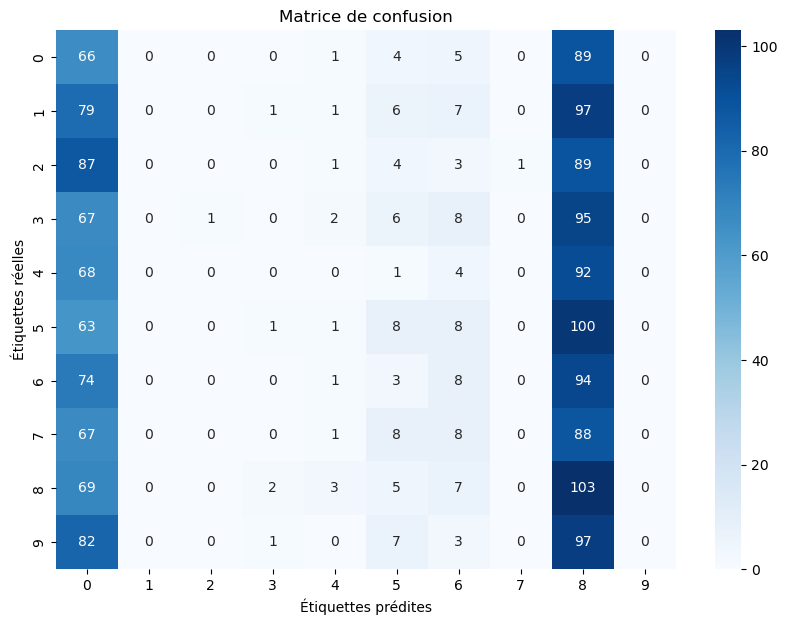

Précision globale : 0.1029


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour classifier les éléments du jeu de test avec les labels majoritaires
def classify_test_set_with_labels(closest_clusters, majority_labels):
    predicted_labels = [majority_labels[cluster] for cluster in closest_clusters]
    return predicted_labels

# Attribuer les labels majoritaires aux clusters les plus proches
predicted_labels = classify_test_set_with_labels(closest_clusters, majority_labels)

# Les vraies étiquettes du jeu de test
actual_labels = test_data[:, -1]

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title('Matrice de confusion')
plt.show()

# Calcul de la précision
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"Précision globale : {accuracy:.4f}")


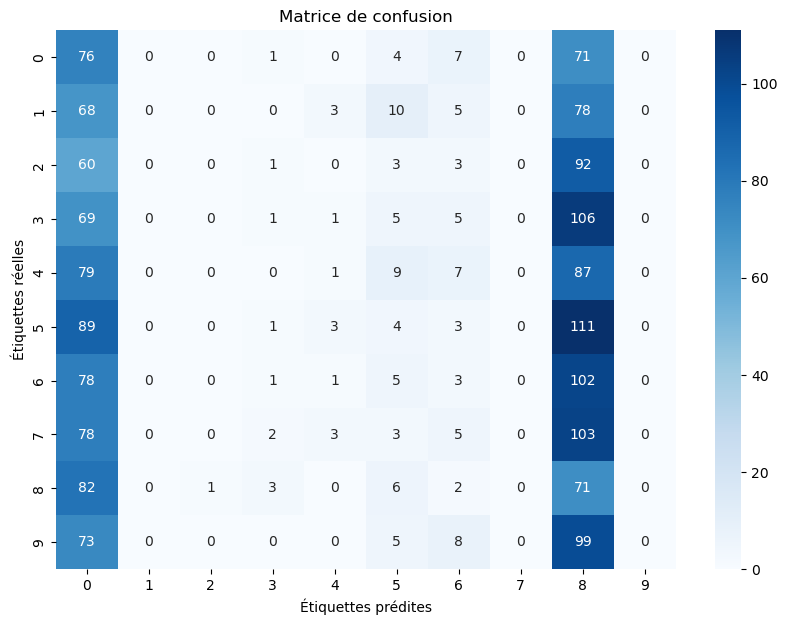

Précision globale : 0.0868


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour classifier les éléments du jeu de test
def classify_test_set(test_data, kmeans, majority_labels):
    test_labels = test_data[:, -1]  # Étiquettes réelles du jeu de test
    test_features = test_data[:, :-1]  # Caractéristiques du jeu de test
    predicted_labels = []
    
    for test_point in test_features:
        # Trouver le centre de cluster le plus proche
        closest_cluster = np.argmin([np.linalg.norm(test_point - center) for center in kmeans.clusters])
        # Attribuer le label majoritaire du cluster le plus proche
        predicted_labels.append(majority_labels[closest_cluster])
    
    return predicted_labels, test_labels

# Simuler des données de test
test_data = np.random.randint(0, 10, size=(1797, 65))

# Classifier les éléments du jeu de test
predicted_labels, actual_labels = classify_test_set(test_data, kmeans, majority_labels)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title('Matrice de confusion')
plt.show()

# Calcul de la précision
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"Précision globale : {accuracy:.4f}")
